In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [14]:
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test_features = pd.read_csv('test_features.csv')

X_train = train_features.drop(columns='id')
X_test = test_features.drop(columns='id')
y_train = train_labels.drop(columns='id')

X_train.shape, X_test.shape, y_train.shape

((59400, 39), (14358, 39), (59400, 1))

In [15]:
X_train.head().T

,0,1,2,3,4
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria


In [16]:
X_train.describe(include='number')

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [17]:
X_train['construction_year_missing'] = X_train['construction_year'] == 0
X_test['construction_year_missing'] = X_test['construction_year'] == 0
X_train['construction_year_missing'].value_counts()

False    38691
True     20709
Name: construction_year_missing, dtype: int64

In [18]:
X_train['payment_equal_to_type'] = X_train['payment_type'] == X_train['payment']
X_test['payment_equal_to_type'] = X_test['payment_type'] == X_test['payment']
X_train['payment_equal_to_type'].value_counts()

True     34559
False    24841
Name: payment_equal_to_type, dtype: int64

In [19]:
# X_train['water_quality'] = X_train['water_quality'].replace({'soft': 'good'})
# X_test['water_quality'] = X_test['water_quality'].replace({'soft': 'good'})

In [20]:
X_train['water_quality_equal_to_group'] = X_train['water_quality'] == X_train['quality_group']
X_test['water_quality_equal_to_group'] = X_test['water_quality'] == X_test['quality_group']

In [13]:
X_train['water_quality_equal_to_group'].value_counts()

True     58554
False      846
Name: water_quality_equal_to_group, dtype: int64

In [21]:
X_train['abandoned_well'] = (X_train['water_quality'] == 'salty abandoned') | (X_train['water_quality'] == 'fluoride abandoned')
X_test['abandoned_well'] = (X_test['water_quality'] == 'salty abandoned') | (X_test['water_quality'] == 'fluoride abandoned')
X_train['abandoned_well'].value_counts()

False    59044
True       356
Name: abandoned_well, dtype: int64

In [16]:
X_train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh_zero,amount_tsh_above_1000
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,2,2
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,True,False
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,41639,56410


### Columns with missing data

funder, installer, subvillage, public_meeting, scheme_management, scheme_name, permit

In [17]:
X_train.isnull().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [22]:
X_train['amount_tsh_zero'] =  X_train['amount_tsh'] <= 0
X_test['amount_tsh_zero'] =  X_test['amount_tsh'] <= 0
X_train['amount_tsh_zero'].value_counts()

True     41639
False    17761
Name: amount_tsh_zero, dtype: int64

In [24]:
X_train['amount_tsh_above_3000'] = X_train['amount_tsh'] > 3000
X_test['amount_tsh_above_3000'] = X_test['amount_tsh'] > 3000
X_train['amount_tsh_above_3000'].value_counts()

False    58252
True      1148
Name: amount_tsh_above_3000, dtype: int64

### Clustering longitude and latitude

In [26]:
train_cluster = X_train[['longitude', 'latitude']]
test_cluster = X_test[['longitude', 'latitude']]
train_cluster.head()

,longitude,latitude
0,34.938093,-9.856322
1,34.698766,-2.147466
2,37.460664,-3.821329
3,38.486161,-11.155298
4,31.130847,-1.825359


In [27]:
from sklearn.cluster import KMeans

train_sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_cluster)
    train_sum_of_squared_distances.append(km.inertia_)

In [28]:
test_sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train_cluster)
    test_sum_of_squared_distances.append(km.inertia_)

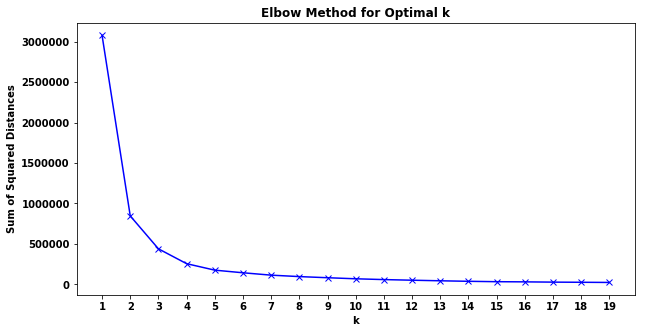

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(K, train_sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.xticks(ticks=range(1,20,1))
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

### Note:

Based on the elbow chart, I want 3 clusters for KMeans

In [31]:
km2 = KMeans(n_clusters=4)
km3 = KMeans(n_clusters=4)
train_km2 = km2.fit(train_cluster)
test_km2 = km3.fit(test_cluster)
X_train['geo_clusters'] = train_km2.labels_
X_test['geo_clusters'] = test_km2.labels_

In [32]:
X_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,construction_year_missing,payment_equal_to_type,water_quality_equal_to_group,abandoned_well,amount_tsh_zero,amount_tsh_above_3000,geo_clusters
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,False,False,False,False,False,True,3
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,False,True,False,False,True,False,2
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,False,False,False,False,False,False,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,False,True,False,False,True,False,3
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,True,False,False,True,False,2


In [51]:
X_train['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [50]:
X_train['num_private'].value_counts()

0       58643
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
50          5
38          4
58          4
9           4
10          4
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, dtype: int64

In [43]:
X_train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [33]:
X_train['water_quality_good_and_seasonal'] = (X_train['quality_group'] == 'good') & (X_train['quantity'] == 'seasonal')
X_test['water_quality_good_and_seasonal'] = (X_test['quality_group'] == 'good') & (X_test['quantity'] == 'seasonal')
X_train['water_quality_good_and_seasonal'].value_counts()

False    55859
True      3541
Name: water_quality_good_and_seasonal, dtype: int64

In [34]:
X_train['water_quality_good_and_dry'] = (X_train['quality_group'] == 'good') & (X_train['quantity'] == 'dry')
X_test['water_quality_good_and_dry'] = (X_test['quality_group'] == 'good') & (X_test['quantity'] == 'dry')
X_train['water_quality_good_and_dry'].value_counts()

False    54973
True      4427
Name: water_quality_good_and_dry, dtype: int64

In [35]:
X_train['water_quality_good_and_insufficient'] = (X_train['quality_group'] == 'good') & (X_train['quantity'] == 'insufficient')
X_test['water_quality_good_and_insufficient'] = (X_test['quality_group'] == 'good') & (X_test['quantity'] == 'insufficient')
X_train['water_quality_good_and_insufficient'].value_counts()

False    46621
True     12779
Name: water_quality_good_and_insufficient, dtype: int64

In [36]:
X_train['water_quality_good_and_enough'] = (X_train['quality_group'] == 'good') & (X_train['quantity'] == 'enough')
X_test['water_quality_good_and_enough'] = (X_test['quality_group'] == 'good') & (X_test['quantity'] == 'enough')
X_train['water_quality_good_and_enough'].value_counts()

True     29901
False    29499
Name: water_quality_good_and_enough, dtype: int64

In [42]:
X_train['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [37]:
X_train['water_quality_good'] =  X_train['quality_group'] == 'good'
X_test['water_quality_good'] =  X_test['quality_group'] == 'good'
X_train['water_quality_good'].value_counts()

True     50818
False     8582
Name: water_quality_good, dtype: int64

In [40]:
X_train['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [38]:
X_train['quantity_equal_to_group'] = X_train['quantity'] == X_train['quantity_group']
X_test['quantity_equal_to_group'] = X_test['quantity'] == X_test['quantity_group']
X_train['quantity_equal_to_group'].value_counts()

True    59400
Name: quantity_equal_to_group, dtype: int64

In [40]:
X_train.shape, X_test.shape, y_train.shape

((59400, 52), (14358, 52), (59400, 1))

In [41]:
from sklearn.model_selection import train_test_split

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train2.shape, X_val2.shape, y_train2.shape, y_val2.shape

((47520, 52), (11880, 52), (47520, 1), (11880, 1))

In [44]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Deal with NaN values
X_train = X_train.fillna('missing')
X_test = X_test.fillna('missing')
X_train2 = X_train2.fillna('missing') 
X_val2 = X_val2.fillna('missing')

encoder1 = ce.OrdinalEncoder()
encoder2 = ce.OrdinalEncoder()
scaler1 = StandardScaler()
scaler2 = StandardScaler()

X_train_encoded = encoder1.fit_transform(X_train)
X_test_encoded = encoder1.transform(X_test)
X_train2_encoded = encoder2.fit_transform(X_train2)
X_val2_encoded = encoder2.transform(X_val2)

X_train_scaled = scaler1.fit_transform(X_train_encoded)
X_test_scaled = scaler1.transform(X_test_encoded)
X_train2_scaled = scaler2.fit_transform(X_train2_encoded)
X_val2_scaled = scaler2.transform(X_val2_encoded)

### Columns to drop:

column quantity_group is a duplicate column and needs to be dropped.

### Example for loop for bagging

In [46]:
model = RandomForestClassifier()
bags = 10
seed = 1

# Create array object to hold bagged predictions
bagged_prediction = np.zeros(X_val2.shape[0])

# Loop for as many times as we want bags
for n in range(0, bags):
    model.set_params(n_estimators=100, max_depth=3, random_state=seed + n)
    model.fit(X_train2_scaled, y_train2)
    preds = model.predict(X_val2_scaled)
    bagged_prediction += preds
    
# take average of predictions
bagged_prediction /= bags

C:\Users\theta\Anaconda3\envs\lambda\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

### Example of stacking

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Split data into train, validation, test

# Specify models
model1 = RandomForestClassifier()
model2 = LogisticRegressor()

# fit models
model1.fit(X_train2_scaled, y_train2)
model2.fit(X_train2_scaled, y_train2)

# make predictions for validation set
y_preds1 = model1.predict(X_val2_scaled)
y_preds2 = model2.predict(X_val2_scaled)

# make predictions for test set
test_preds1 = model1.predict(X_test)
test_preds2 = model2.predict(X_test)

# form new dataframe for validation and test via stacking the predictions
stacked_predictions = np.column_stack((y_preds1, y_preds2))
stacked_test_predictions = np.column_stack((test_preds1, test_preds2))

# specify meta model
meta_model = RandomForestClassifier()

# fit meta model on stacked predictions
meta_mode.fit(stacked_predictions, y_val)

# make predictions on the stacked predictions of the test data
final_predictions = meta_model.predict(stacked_test_predictions)

ImportError: cannot import name 'LogisticRegressor' from 'sklearn.linear_model' (C:\Users\theta\Anaconda3\envs\lambda\lib\site-packages\sklearn\linear_model\__init__.py)